In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

df_slr = pd.read_excel('./SLR.xlsx', 'ACM DL (Accepted)')
df_slr = df_slr[-df_slr['Titulo'].isnull()]
df_slr = df_slr[df_slr['Aceptado'] == 'Si']

authors = df_slr['Autores'].map(lambda authors_string: authors_string.split(','))
editors = df_slr['Publicacion']
field = df_slr['Campo']
participants = df_slr['Participantes']
test = df_slr['Evaluacion']
year = df_slr['Año']

authors_list = np.char.strip(np.concatenate(authors.ravel()))
unique_elements, counts_elements = np.unique(authors_list, return_counts=True)
authors_count = pd.DataFrame({'Autor': unique_elements, 'Apariciones': counts_elements}, columns=['Autor', 'Apariciones'])
#HTML(authors_count.to_html())
authors_count

,Autor,Apariciones
0,A. Sivanathan,1
1,Alan Chamberlain,1
2,Alex Barelka,1
3,Ali Oker,1
4,Celine Coutrix,1
5,Changqin Quan,1
6,Christine Passerieux,1
7,Christopher Martin,1
8,David Vandyke,1
9,Diane Paverman,1


In [2]:
ordered_authors = authors_count.sort_values(['Apariciones'], ascending=False)
other_authors = ordered_authors[ordered_authors['Apariciones'] < 2]['Apariciones'].sum()
ordered_authors = ordered_authors[ordered_authors['Apariciones'] >= 2]
ordered_authors

,Autor,Apariciones
46,Rainer Höger,2
54,Tessa-Karina Tews,2
13,Felix W. Siebert,2
39,Michael Oehl,2


In [3]:
ordered_authors = ordered_authors.append(pd.DataFrame([['Varios', other_authors]], columns=['Autor', 'Apariciones']), ignore_index=True)
ordered_authors.set_index('Autor', inplace=True)
ordered_authors

,Apariciones
Autor,
Rainer Höger,2
Tessa-Karina Tews,2
Felix W. Siebert,2
Michael Oehl,2
Varios,59


In [4]:
ordered_authors = ordered_authors.rename(index=str, columns={'Apariciones':'Porcentaje de aparición'})

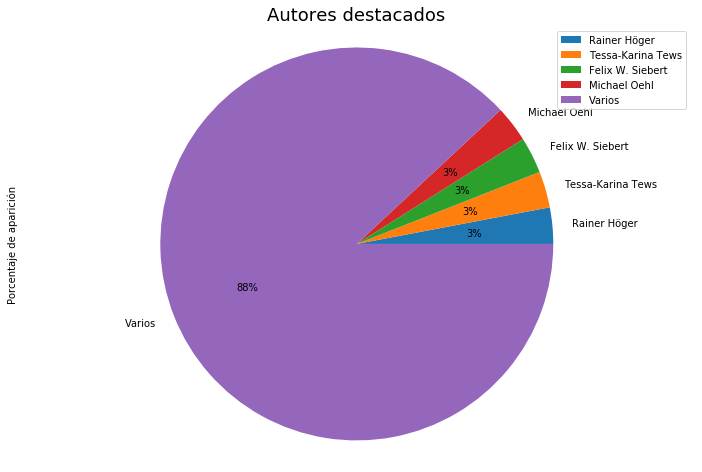

In [5]:
plot = ordered_authors.plot.pie(y='Porcentaje de aparición', autopct='%.0f%%', figsize=(12, 8))
plot.axis('equal')
#plot.legend(prop={'size': 10})
plt.title('Autores destacados')
plt.show()

In [30]:
participants

1     60.0
2     60.0
4     59.0
5     24.0
10     0.0
12    59.0
14     0.0
16     6.0
17    16.0
18    30.0
19    15.0
20    24.0
21     0.0
22    11.0
Name: Participantes, dtype: float64

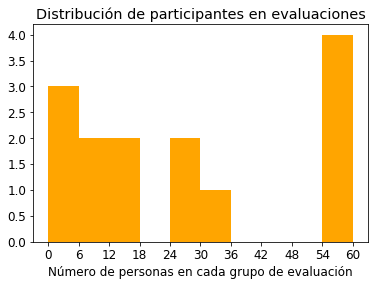

In [40]:
plt.hist(participants, bins=10, align='mid', color='orange')
plt.title('Distribución de participantes en evaluaciones')
matplotlib.rcParams.update({'font.size': 12})

plt.xticks(np.arange(min(participants), max(participants)+1, 6.0))
plt.xlabel('Número de personas en cada grupo de evaluación')
plt.show()

In [7]:
#field = df_slr['Campo']
clean_field = [x for x in field if str(x) != 'nan']
clean_field

['Psicología',
 'Psicología',
 'Psicología',
 'Marketing',
 'Marketing',
 'Psicología',
 'Marketing',
 'Educación',
 'Medicina',
 'UX',
 'UX',
 'UX',
 'Medicina',
 'UX']

In [8]:
unique_elements, counts_elements = np.unique(clean_field, return_counts=True)
print(unique_elements,'\n', counts_elements)
field_count = pd.DataFrame({'Campo': unique_elements, 'Apariciones': counts_elements}, columns=['Campo', 'Apariciones'])
field_count.set_index('Campo', inplace=True)
field_count

['Educación' 'Marketing' 'Medicina' 'Psicología' 'UX'] 
 [1 3 2 4 4]


,Apariciones
Campo,
Educación,1
Marketing,3
Medicina,2
Psicología,4
UX,4


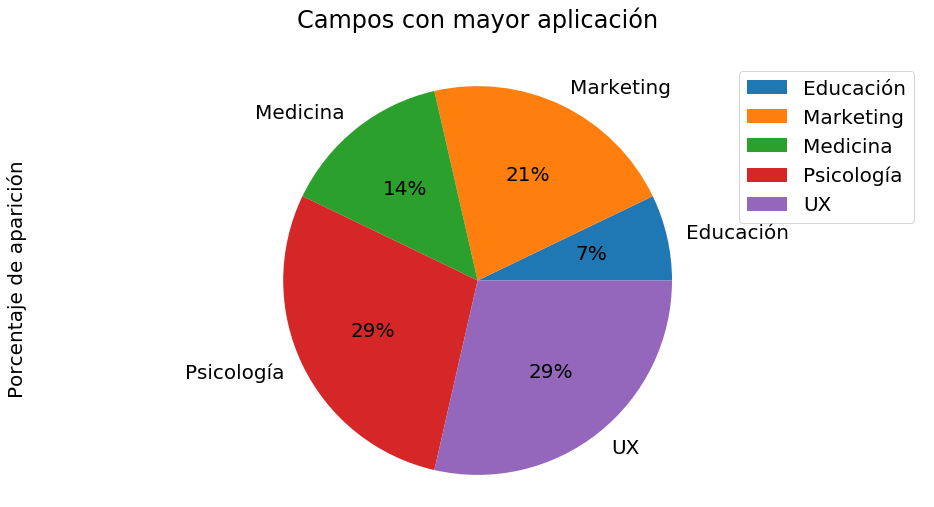

In [15]:
field_count = field_count.rename(index=str, columns={'Apariciones': 'Porcentaje de aparición'})
plot = field_count.plot.pie(y='Porcentaje de aparición', autopct='%.0f%%', figsize=(16, 8))
matplotlib.rcParams.update({'font.size': 20})
plot.axis('equal')
plt.title('Campos con mayor aplicación\n')
plt.show()

In [10]:
unique_elements, counts_elements = np.unique(editors, return_counts=True)
print(unique_elements,'\n', counts_elements)
editors_count = pd.DataFrame({'Editor': unique_elements, 'Apariciones': counts_elements}, columns=['Editor', 'Apariciones'])
editors_count.set_index('Editor', inplace=True)
editors_count = editors_count.rename(index=str, columns={'Apariciones': 'Porcentaje de aparición'})

['ACM' 'BCS HCI' 'Elvesier' 'Hindawi' 'IEEE' 'IGI Global' 'ScitePress'
 'Springer'] 
 [1 1 1 2 4 1 1 3]


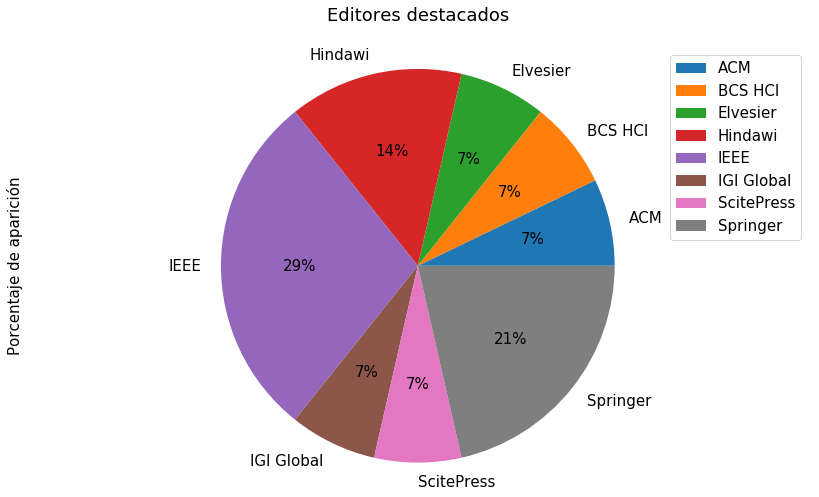

In [17]:
plot = editors_count.plot.pie(y='Porcentaje de aparición', autopct='%.0f%%', figsize=(14, 8))
plot.axis('equal')
plt.title('Editores destacados\n')
plt.show()

In [16]:
unique_elements

array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.])

In [18]:
unique_elements, counts_elements = np.unique(year, return_counts=True)
year_count = pd.DataFrame({'Año': unique_elements, 'Apariciones': counts_elements}, columns=['Año', 'Apariciones'])
year_count.set_index('Año', inplace=True)
# plot = year_count.plot.pie(y='Apariciones', autopct='%.0f%%', figsize=(12, 6))
# plot.axis('equal')
# plt.title('Distribucion Año')

In [19]:
from math import floor
unique_elements
unique_elements = list(map(lambda x: str(floor(x)), unique_elements))
unique_elements

['2011', '2012', '2013', '2014', '2015', '2016']

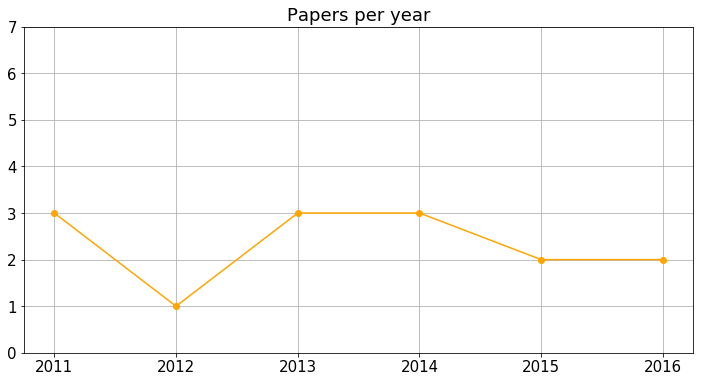

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(unique_elements)), counts_elements, marker='o', color='orange')
plt.xticks(np.arange(len(unique_elements)), unique_elements)
plt.ylim(0, 7)
plt.grid(True)
plt.title('Papers per year')
plt.show()

In [23]:
import os
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer

text_corpus = np.array([])

for file in os.listdir('./data'):
    with open('./data/' + file, encoding='utf-8') as file_content:
        text_corpus = np.append(text_corpus, file_content.readlines())

text_corpus = ' '.join(text_corpus)

#Compile the regex to find not alphanumeric characters and numbers and substitutes them by " " in the text_corpus variable.
text_corpus = re.compile('[\W]|\d').sub(" ", text_corpus)

stopwords_en = nltk.corpus.stopwords.words('english')   # Extrae las stop words en inglés
stemmer = PorterStemmer()  

def extractTerms(text):
    key_words = [
        'model', 
        'user', 
        'emotion', 
        'participant', 
        'using', 
        'facial', 
        'expression', 
        'research', 
        'data',
        'emotions',
        'feature',
        'based',
        'subject',
        'system',
        'used'
    ]
    #-------------
    # Nos quedamos con los tokens del texto que no esten en stopwords_en
    word_list = [x.lower() for x in nltk.word_tokenize(text) if x.lower() not in stopwords_en and x.lower() not in key_words]
    #-------------   
    return word_list

text_corpus = extractTerms(text_corpus)
text_corpus[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garci\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['computer',
 'aided',
 'design',
 'contents',
 'lists',
 'available',
 'sciencedirect',
 'computer',
 'aided',
 'design']

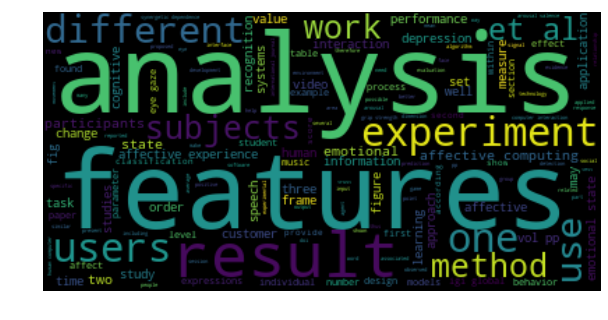

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(text_corpus))

# Display the generated image:
fig = plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

df_slr = pd.read_excel('./SLR.xlsx', 'ACM DL (Rejected)')
df_slr = df_slr[-df_slr['Titulo'].isnull()]
authors = df_slr['Autores'].map(lambda authors_string: authors_string.split(','))
reasons = df_slr['Razon'].map(lambda authors_string: authors_string.split(' '))

authors_list = np.char.strip(np.concatenate(authors.ravel()))
unique_elements, counts_elements = np.unique(authors_list, return_counts=True)
authors_count = pd.DataFrame({'Autor': unique_elements, 'Apariciones': counts_elements}, columns=['Autor', 'Apariciones'])
#HTML(authors_count.to_html())
authors_count

,Autor,Apariciones
0,,1
1,.,1
2,A. Origlia,1
3,A. Revathi,1
4,Abdoul Matine Ousmane,1
5,Abhinav Dhall,1
6,Adam K. Anderson,1
7,Adnan Mehmood Bhatti,1
8,Aggeliki Vlachostergiou,1
9,Ahmad Almogren,1


In [28]:
reasons_list = np.char.strip(np.concatenate(reasons.ravel()))
unique_elements, counts_elements = np.unique(reasons_list, return_counts=True)
reasons_count = pd.DataFrame({'Razon': unique_elements, 'Apariciones': counts_elements}, columns=['Razon', 'Apariciones'])
#HTML(authors_count.to_html())
reasons_count = reasons_count.sort_values('Apariciones', ascending=False)
reasons_count

,Razon,Apariciones
211,de,130
250,en,93
245,emociones,85
352,la,74
411,para,67
80,Propone,54
561,voz,31
223,detectar,31
535,un,29
564,y,28


In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

df_slr_r = pd.read_excel('./SLR.xlsx', 'ACM DL (Rejected)')
df_slr_r = df_slr_r[-df_slr_r['Titulo'].isnull()]
authors_r = df_slr_r['Autores'].map(lambda authors_string: authors_string.split(','))
editors_r = df_slr_r['Razon']

authors_r_list = np.char.strip(np.concatenate(authors_r.ravel()))
unique_elements_r, counts_elements_r = np.unique(authors_r_list, return_counts=True)
authors_count_r = pd.DataFrame({'Autor': unique_elements_r, 'Apariciones': counts_elements_r}, columns=['Autor', 'Apariciones'])
#HTML(authors_count.to_html())
authors_count_r

,Autor,Apariciones
0,,1
1,.,1
2,A. Origlia,1
3,A. Revathi,1
4,Abdoul Matine Ousmane,1
5,Abhinav Dhall,1
6,Adam K. Anderson,1
7,Adnan Mehmood Bhatti,1
8,Aggeliki Vlachostergiou,1
9,Ahmad Almogren,1


In [34]:
ordered_authors_r = authors_count_r.sort_values(['Apariciones'], ascending=False)
other_authors_r = ordered_authors_r[ordered_authors_r['Apariciones'] <= 3]['Apariciones'].sum()
ordered_authors_r = ordered_authors_r[ordered_authors_r['Apariciones'] > 3]
ordered_authors_r

,Autor,Apariciones
148,Hichem Sahli,4
314,Rafael A. Calvo,4
298,Peter Robinson,4


In [35]:
ordered_authors_r = ordered_authors_r.append(pd.DataFrame([['Rest', other_authors_r]], columns=['Autor', 'Apariciones']), ignore_index=True)
ordered_authors_r.set_index('Autor', inplace=True)
ordered_authors_r

,Apariciones
Autor,
Hichem Sahli,4
Rafael A. Calvo,4
Peter Robinson,4
Rest,501


In [36]:
ordered_authors_r = ordered_authors_r.rename(index=str, columns={'Apariciones':'Percentage of appearance'})

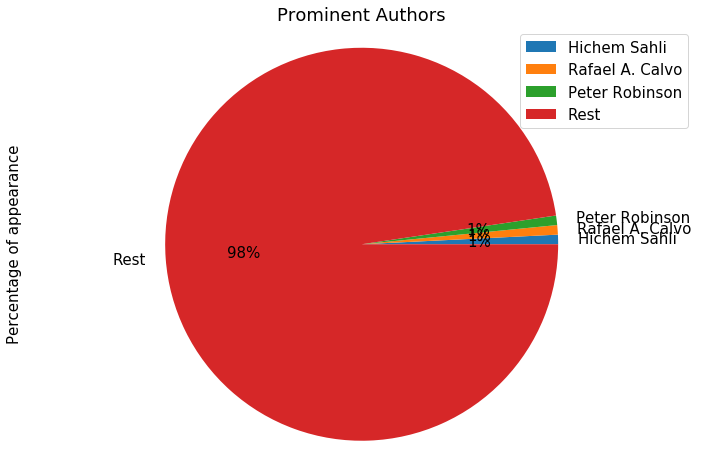

In [37]:
plot = ordered_authors_r.plot.pie(y='Percentage of appearance', autopct='%.0f%%', figsize=(12, 8))
matplotlib.rcParams.update({'font.size': 15})
plot.axis('equal')
#plot.legend(prop={'size': 10})
plt.title('Prominent Authors')
plt.show()